****Data Science Assessment****


This is a notebook that will count as a technical assessment for Andani.africa's data science position. This notebook uses the Open University Learning Analytics dataset. The dataset has seven csv files that include are as follows:

- assessments.csv - shows the different assessments for the different modules and what they count towards.

- course.csv - shows the differengt modules and how long they run for.

- studentassessment.csv - shows the marks that the different students got for the different modules.

- studentinfo.csv - shows the students information such as their student id, gender, age, modules they are doing and where they are from.

- studentvle.csv - shows how many times the students visited the virtual learning environment for the different modules.

- studentregistration.csv - shows whether each student has registered for a certain module and when they registered for the module and when they deregistered for said module.

- vle.csv - shows the type of content in the virtual learning environment for the different modules and when they were added.



****1.1. Importing the neccessary libraries****

Here we load the different libraries that i feel like will be needed to complete my notebook.

In [45]:
# Ensure NumPy and dependent libraries are properly installed
%pip install --upgrade numpy
%pip install --upgrade matplotlib seaborn scikit-learn pandas

# Ensure matplotlib and seaborn are compatible
import matplotlib
import seaborn
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {seaborn.__version__}")

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
matplotlib version: 3.10.1
seaborn version: 0.13.2


****1.2. Loading the datasets****

Here we load the different datasets into the notebook creating dataframes from the csv files

In [46]:
student_info=pd.read_csv(r"anonymisedData/studentInfo.csv")
assessments=pd.read_csv(r"anonymisedData/assessments.csv")
student_ass=pd.read_csv(r"anonymisedData/studentAssessment.csv")
student_vle=pd.read_csv(r"anonymisedData/studentVle.csv")
vle=pd.read_csv(r"anonymisedData/vle.csv")

In [47]:
student_ass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [48]:
unique_values = student_ass['id_student'].unique()
print("Unique values:", unique_values)  


# Count unique values
num_unique = student_ass['id_student'].nunique()
print("Number of unique values:", num_unique)  # Output: 3


Unique values: [ 11391  28400  31604 ... 692171 650630 573320]
Number of unique values: 23369


# 2. Feature Engineering

Here we will discuss how we used the given data in order to create features that made sense in order to build the model

**Assessments**

In [49]:
exams=assessments[assessments["assessment_type"]=="Exam"]
others=assessments[assessments["assessment_type"]!="Exam"]
amounts=others.groupby(["code_module","code_presentation"]).count()["id_assessment"] 
amounts=amounts.reset_index()
amounts.head()
#Here we have the total amount of assessments by module

,code_module,code_presentation,id_assessment
0,AAA,2013J,5
1,AAA,2014J,5
2,BBB,2013B,11
3,BBB,2013J,11
4,BBB,2014B,11


C:\Users\Orifuna\AppData\Local\Temp\ipykernel_33996\1293254042.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=assessments, x="assessment_type", palette='viridis')


<Axes: xlabel='assessment_type', ylabel='count'>

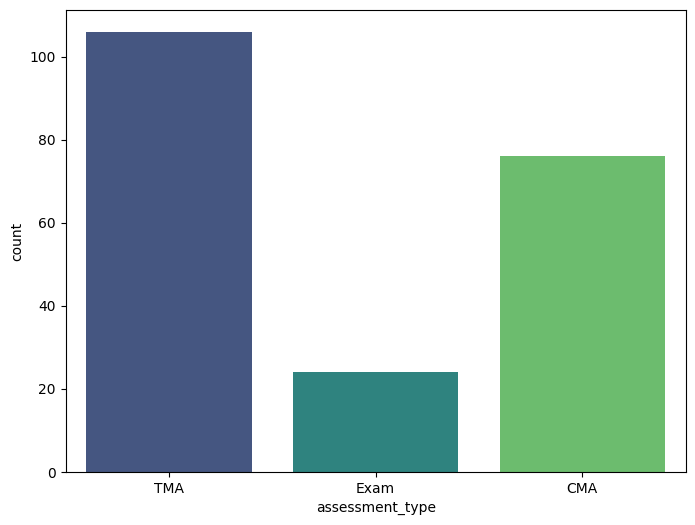

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(data=assessments, x="assessment_type", palette='viridis')

In [51]:
#Function to determine whether a student passed a given assessment
def pass_fail(grade):
    if grade>=40:
        return True
    else:
        return False
#Creating the stud_ass dataframe to join infos about the assessment weights and their respective grades
stud_assessment=pd.merge(student_ass,others,how="inner",on=["id_assessment"])
stud_assessment["pass"]=stud_assessment["score"].apply(pass_fail)
stud_assessment["weighted_grade"]=stud_assessment["score"]*stud_assessment["weight"]/100

In [52]:
stud_assessment

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,pass,weighted_grade
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,True,7.8
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,True,7.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,True,7.2
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,True,6.9
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,True,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...
168948,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0,True,0.0
168949,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0,True,0.0
168950,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0,True,0.0
168951,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0,True,0.0


In [53]:
#Final assessment average per student per module
avg_grade=stud_assessment.groupby(["id_student","code_module","code_presentation"]).sum()["weighted_grade"].reset_index()
avg_grade.head()

,id_student,code_module,code_presentation,weighted_grade
0,6516,AAA,2014J,63.50
1,8462,DDD,2013J,34.90
2,8462,DDD,2014J,43.00
3,11391,AAA,2013J,82.40
4,23629,BBB,2013B,16.69


In [54]:
#Pass rate per student per module
pass_rate=pd.merge((stud_assessment[stud_assessment["pass"]==True].groupby(["id_student","code_module","code_presentation"]).count()["pass"]).reset_index(),amounts,how="left",on=["code_module","code_presentation"])
pass_rate["pass_rate"]=pass_rate["pass"]/pass_rate["id_assessment"]
pass_rate.drop(["pass","id_assessment"], axis=1,inplace=True)
pass_rate.head()

,id_student,code_module,code_presentation,pass_rate
0,6516,AAA,2014J,1.000000
1,8462,DDD,2013J,0.500000
2,8462,DDD,2014J,0.666667
3,11391,AAA,2013J,1.000000
4,23629,BBB,2013B,0.363636


In [55]:
#Final exam scores
stud_exams=pd.merge(student_ass,exams,how="inner",on=["id_assessment"])
stud_exams["exam_score"]=stud_exams["score"]
stud_exams.drop(["id_assessment","date_submitted","is_banked", "score","assessment_type","date","weight"],axis=1,inplace=True)
stud_exams.head()

,id_student,code_module,code_presentation,exam_score
0,558914,CCC,2014B,32.0
1,559706,CCC,2014B,78.0
2,559770,CCC,2014B,54.0
3,560114,CCC,2014B,64.0
4,560311,CCC,2014B,100.0


**Virtual Learning Environment analysis**


In [56]:
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [57]:
vle[~vle["week_from"].isna()]

,id_site,code_module,code_presentation,activity_type,week_from,week_to
113,546732,AAA,2013J,oucontent,2.0,2.0
198,546719,AAA,2013J,oucontent,1.0,1.0
210,546681,AAA,2013J,oucontent,1.0,1.0
264,877040,AAA,2014J,oucontent,2.0,2.0
323,877045,AAA,2014J,oucontent,1.0,1.0
...,...,...,...,...,...,...
6243,798728,GGG,2014B,resource,1.0,1.0
6266,897051,GGG,2014J,resource,2.0,2.0
6285,897121,GGG,2014J,resource,1.0,1.0
6304,897050,GGG,2014J,resource,1.0,1.0


In [58]:
student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [59]:
#Here we can track the average time after the start of the course the student took to use the materials
#and the average amount of clicks per material
avg_per_site=student_vle.groupby(["id_student","id_site","code_module","code_presentation"]).mean().reset_index()
avg_per_site.head()

,id_student,id_site,code_module,code_presentation,date,sum_click
0,6516,877011,AAA,2014J,210.333333,3.833333
1,6516,877012,AAA,2014J,90.833333,2.310606
2,6516,877015,AAA,2014J,113.461538,2.000000
3,6516,877023,AAA,2014J,122.666667,2.000000
4,6516,877025,AAA,2014J,41.142857,4.333333


In [60]:
#General average per student per module
avg_per_student=avg_per_site.groupby(["id_student","code_module","code_presentation"]).mean()[["date","sum_click"]].reset_index()
avg_per_student.head()

,id_student,code_module,code_presentation,date,sum_click
0,6516,AAA,2014J,105.292573,5.816135
1,8462,DDD,2013J,38.794704,1.734524
2,8462,DDD,2014J,10.000000,3.000000
3,11391,AAA,2013J,111.739069,4.231515
4,23629,BBB,2013B,33.409632,2.817316


**Student Information analysis**


In [61]:
#Removing the cases where the student has withdrawn their registration to the module
studInfo=student_info[student_info["final_result"]!="Withdrawn"]
studInfo=studInfo[["code_module","code_presentation","id_student","num_of_prev_attempts","final_result"]]
studInfo.head()

,code_module,code_presentation,id_student,num_of_prev_attempts,final_result
0,AAA,2013J,11391,0,Pass
1,AAA,2013J,28400,0,Pass
3,AAA,2013J,31604,0,Pass
4,AAA,2013J,32885,0,Pass
5,AAA,2013J,38053,0,Pass


In [62]:
unique_values = studInfo['id_student'].unique()
print("Unique values:", unique_values)  # Output: [1 2 3]

# Count unique values
num_unique = studInfo['id_student'].nunique()
print("Number of unique values:", num_unique)  # Output: 3

Unique values: [  11391   28400   31604 ... 2645731 2648187 2684003]
Number of unique values: 21118


**Merging Dataframes**

In [63]:
df_1=pd.merge(avg_grade,pass_rate,how="inner",on=["id_student","code_module","code_presentation"])
assessment_info=pd.merge(df_1, stud_exams, how="inner", on=["id_student","code_module","code_presentation"])
assessment_info.head()

,id_student,code_module,code_presentation,weighted_grade,pass_rate,exam_score
0,23698,CCC,2014J,69.97,1.000000,80.0
1,24213,DDD,2014B,78.40,1.000000,58.0
2,27116,CCC,2014J,92.02,1.000000,96.0
3,28046,DDD,2013J,49.90,0.833333,40.0
4,28787,CCC,2014J,11.98,0.375000,44.0


In [64]:
df_2=pd.merge(studInfo,assessment_info,how="inner",on=["id_student","code_module","code_presentation"])
df=pd.merge(df_2,avg_per_student,how="inner", on=["id_student","code_module","code_presentation"])
df.drop(["id_student","code_module","code_presentation"],axis=1,inplace=True)
df.head()
#The final dataframe only has information relevant to the problem

,num_of_prev_attempts,final_result,weighted_grade,pass_rate,exam_score,date,sum_click
0,0,Distinction,89.65,1.000,94.0,103.457907,2.706754
1,0,Pass,84.58,1.000,76.0,87.617265,1.539047
2,0,Pass,51.44,0.625,66.0,49.181286,1.562619
3,0,Pass,75.13,1.000,50.0,118.698642,2.189217
4,0,Distinction,93.22,1.000,98.0,75.791987,2.100617


**3. Exploratory Data Analysis**

We go through the data and look at it's shape and what columns the dataframe we will be using consists of.

In [65]:
df.describe()

,num_of_prev_attempts,weighted_grade,pass_rate,exam_score,date,sum_click
count,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000
mean,0.118586,66.280909,0.868616,65.604444,101.047138,2.016114
std,0.395313,21.221975,0.182934,20.564815,24.917830,0.722249
min,0.000000,1.120000,0.125000,0.000000,17.566546,1.000000
25%,0.000000,51.512500,0.769231,51.000000,84.681549,1.545160
50%,0.000000,69.760000,1.000000,67.000000,99.934672,1.802246
75%,0.000000,83.622500,1.000000,82.000000,116.635412,2.279943
max,5.000000,100.000000,1.000000,100.000000,237.035714,13.134308


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4950 entries, 0 to 4949
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_of_prev_attempts  4950 non-null   int64  
 1   final_result          4950 non-null   object 
 2   weighted_grade        4950 non-null   float64
 3   pass_rate             4950 non-null   float64
 4   exam_score            4950 non-null   float64
 5   date                  4950 non-null   float64
 6   sum_click             4950 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 270.8+ KB


<Axes: >

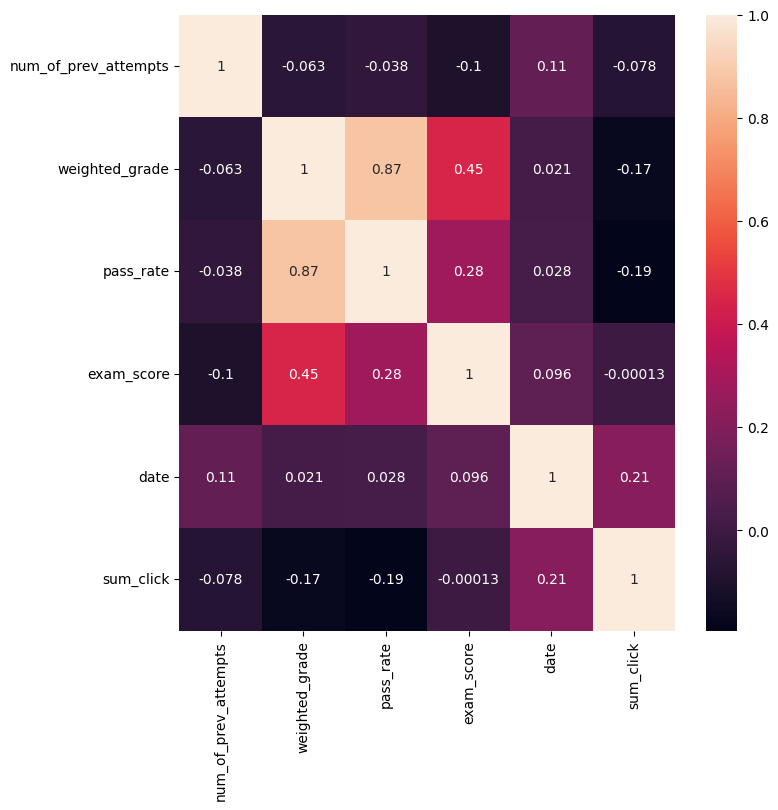

In [67]:

# Exclude non-numeric columns before computing the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 8))
sns.heatmap(numeric_df.corr(), annot=True)

C:\Users\Orifuna\AppData\Local\Temp\ipykernel_33996\1240562519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='final_result', y='weighted_grade', palette='Set2')


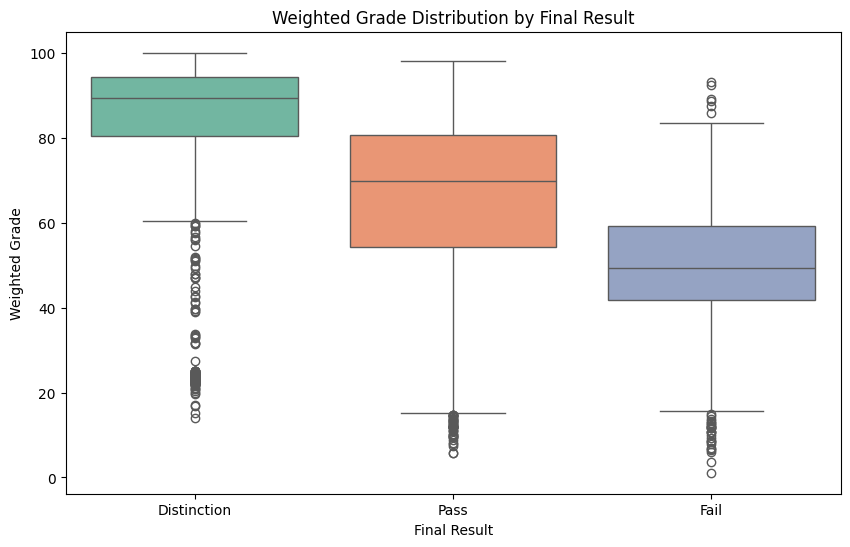

C:\Users\Orifuna\AppData\Local\Temp\ipykernel_33996\1240562519.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='final_result', y='pass_rate', palette='Set3')


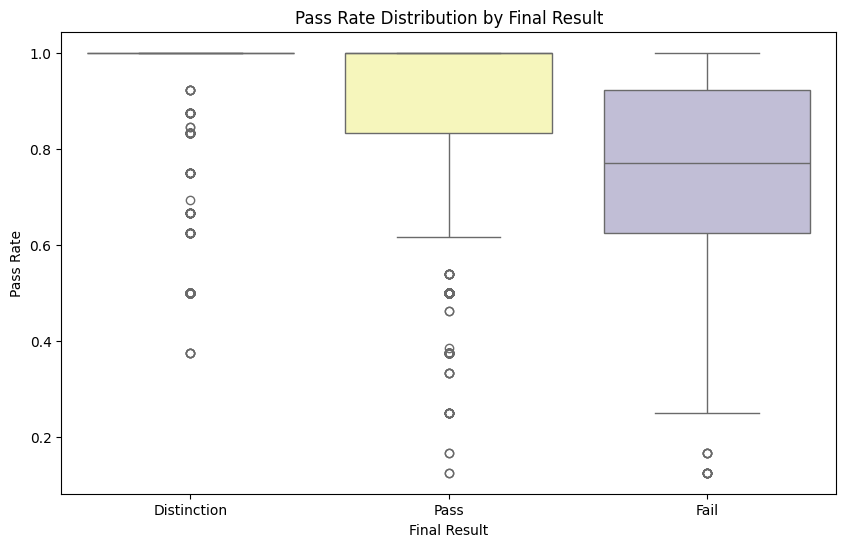

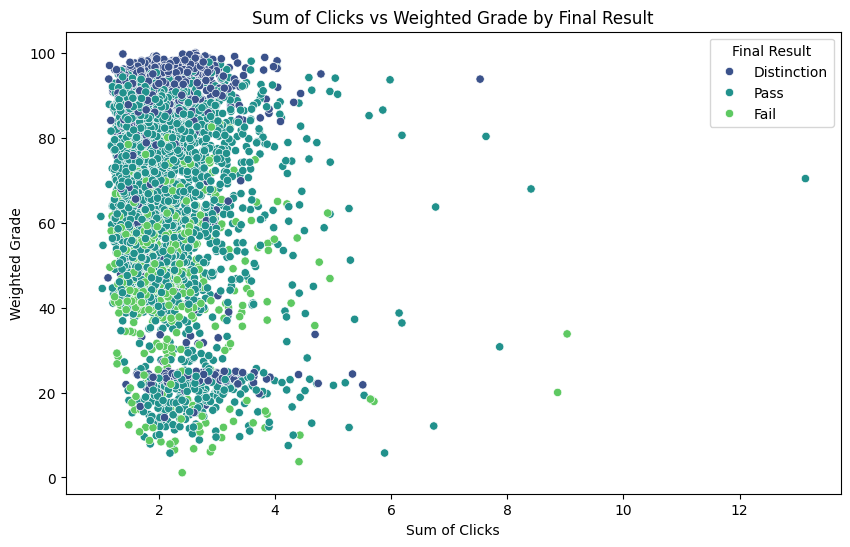

In [68]:
# Boxplot to show the distribution of weighted grades for each final result
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='final_result', y='weighted_grade', palette='Set2')
plt.title('Weighted Grade Distribution by Final Result')
plt.xlabel('Final Result')
plt.ylabel('Weighted Grade')
plt.show()

# Boxplot to show the distribution of pass rates for each final result
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='final_result', y='pass_rate', palette='Set3')
plt.title('Pass Rate Distribution by Final Result')
plt.xlabel('Final Result')
plt.ylabel('Pass Rate')
plt.show()

# Scatterplot to show the relationship between sum_click and weighted_grade, colored by final result
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sum_click', y='weighted_grade', hue='final_result', palette='viridis')
plt.title('Sum of Clicks vs Weighted Grade by Final Result')
plt.xlabel('Sum of Clicks')
plt.ylabel('Weighted Grade')
plt.legend(title='Final Result')
plt.show()

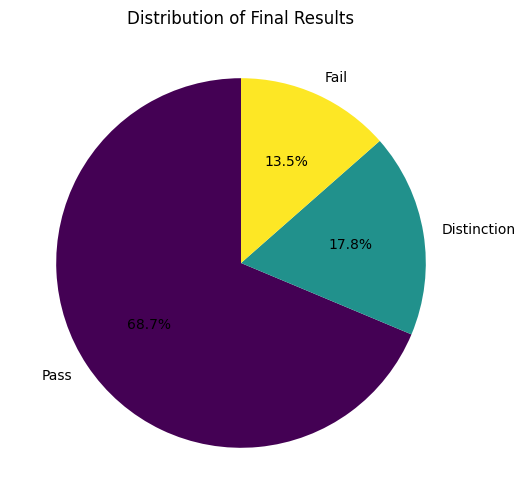

In [69]:
# Plot a pie chart to visualize the distribution of final results
plt.figure(figsize=(8, 6))
df['final_result'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.ylabel('')  
plt.title('Distribution of Final Results')
plt.show()

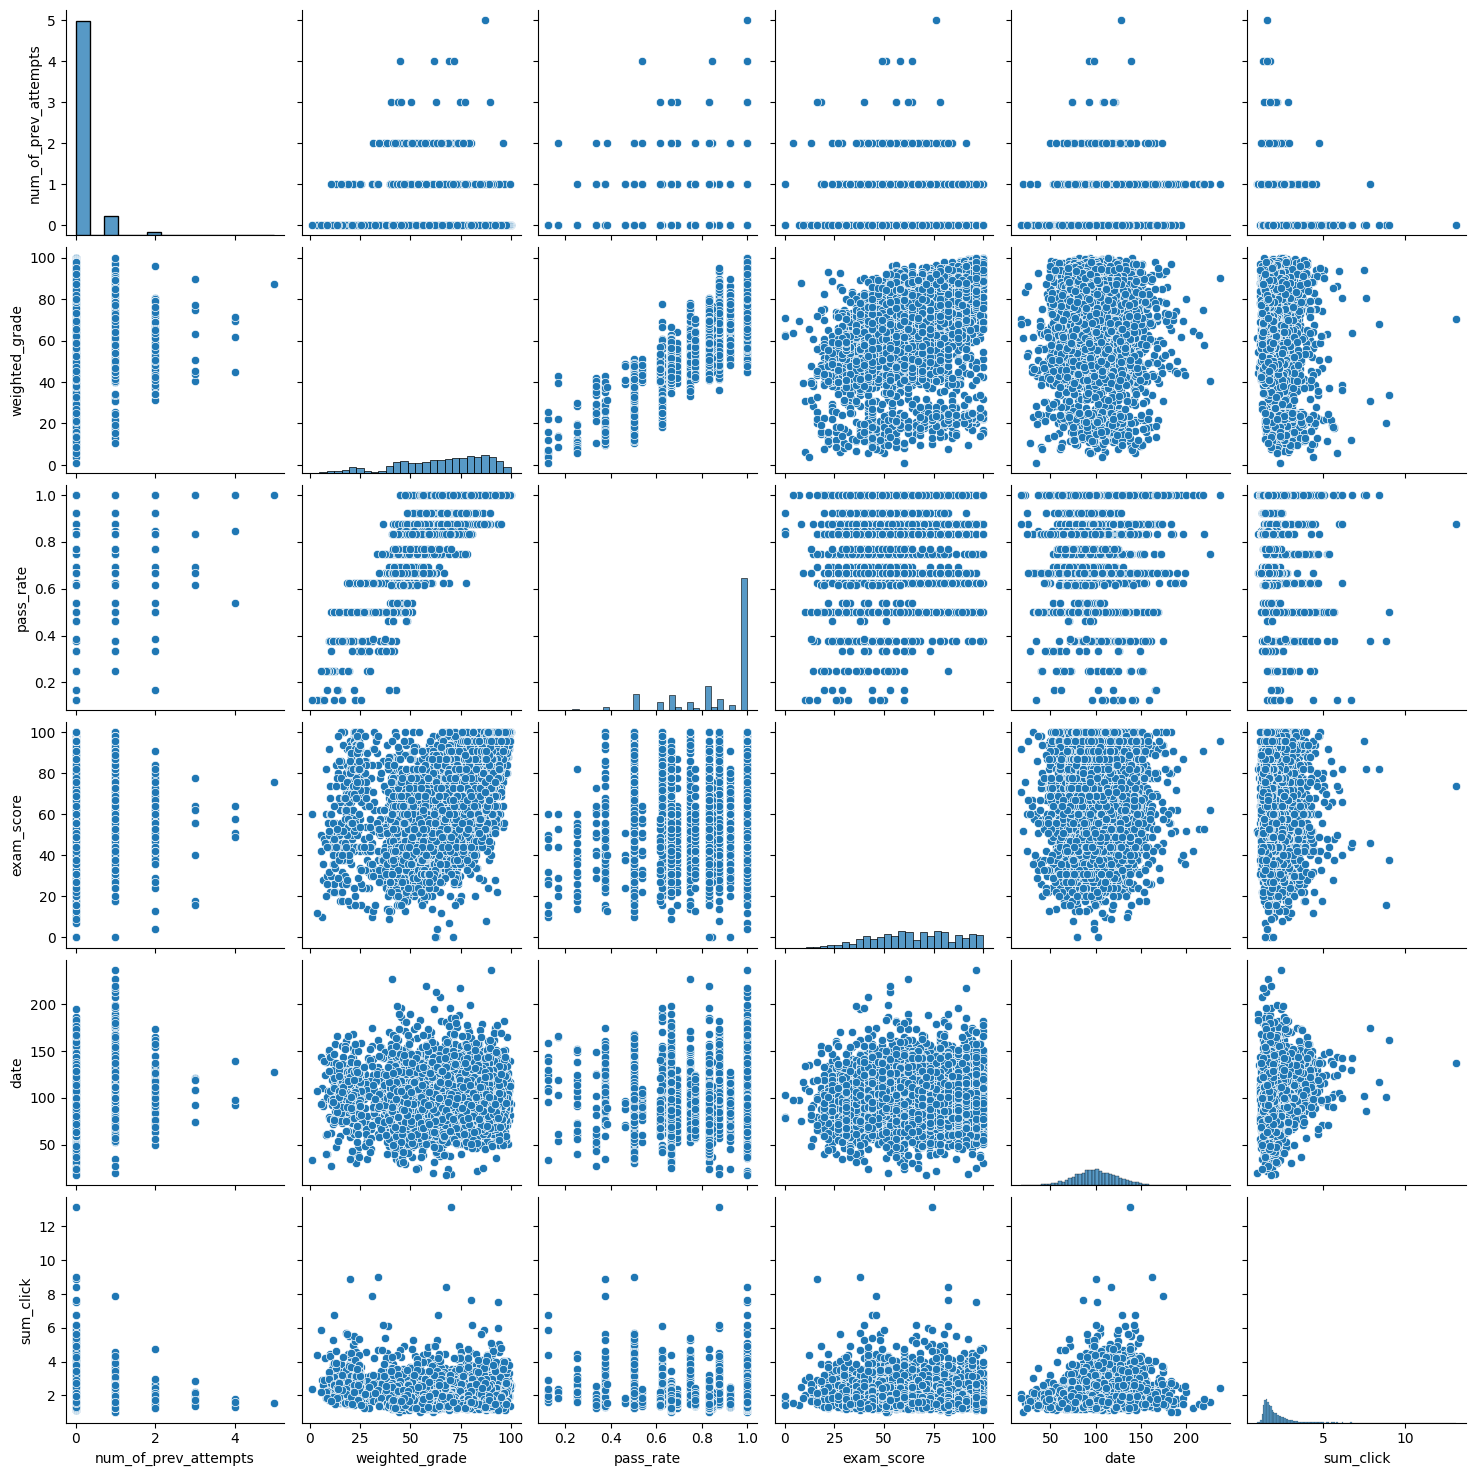

In [70]:
# Create a pairplot to visualize pairwise relationships between features in the dataframe
sns.pairplot(df)

In the pairplot, two outliers are noticeable: one with an unusually high average click count and another with a unique number of previous attempts. To maintain data consistency, these outliers will be excluded.

In [71]:
# Filter rows where the sum of clicks is greater than 10 to identify potential outliers
df[df["sum_click"] > 10]

,num_of_prev_attempts,final_result,weighted_grade,pass_rate,exam_score,date,sum_click
71,0,Pass,70.37,0.875,74.0,137.702513,13.134308


In [72]:
# Filter rows where the number of previous attempts is greater than 4
# This helps identify outliers in the dataset based on the number of previous attempts
df[df["num_of_prev_attempts"] > 4]

,num_of_prev_attempts,final_result,weighted_grade,pass_rate,exam_score,date,sum_click
4908,5,Pass,87.3,1.0,76.0,127.634406,1.558457


In [73]:
# Filter out rows where the sum of clicks is greater than 10 (outlier removal)
df = df[df["sum_click"] <= 10]

# Filter out rows where the number of previous attempts is greater than 4 (outlier removal)
df = df[df["num_of_prev_attempts"] <= 4]

# Display the first few rows of the filtered dataframe
df.head()

,num_of_prev_attempts,final_result,weighted_grade,pass_rate,exam_score,date,sum_click
0,0,Distinction,89.65,1.000,94.0,103.457907,2.706754
1,0,Pass,84.58,1.000,76.0,87.617265,1.539047
2,0,Pass,51.44,0.625,66.0,49.181286,1.562619
3,0,Pass,75.13,1.000,50.0,118.698642,2.189217
4,0,Distinction,93.22,1.000,98.0,75.791987,2.100617


**4. Modeling**

For the modeling phase, we will employ the following approaches and algorithms:

* Utilize cross-validation alongside classification reports and confusion matrices to assess model performance.

* Implement Random Forest.

* Apply Logistic Regression.

* Use Linear Discriminant Analysis.

In [74]:
# Separate the features (X) from the target variable (y)
X = df.drop("final_result", axis=1)

# Split the dataset into training and testing sets
# 80% of the data will be used for training, and 20% for testing
y = df["final_result"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y=df["final_result"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

**Due to the strong correlation between *weighted_grade* and *pass_rate*, the models will be trained on three different input configurations: one including both features, and two others where each feature is excluded individually from the dataset.**

In [75]:
#1 contains both, 2 just pass_rate and  3 just weighted_grade
X1_test=X_test
# Configuration 1: Includes both 'pass_rate' and 'weighted_grade'
X1_train = X_train
X2_test = X_test.drop("weighted_grade", axis=1)

# Configuration 2: Excludes 'weighted_grade'
X2_train = X_train.drop("weighted_grade", axis=1)

# Configuration 3: Excludes 'pass_rate'
X3_test = X_test.drop("pass_rate", axis=1)
X3_train=X_train.drop("pass_rate",axis=1)

In [76]:
# Initialize a MinMaxScaler for the first configuration
scaler1 = MinMaxScaler()

# Initialize a MinMaxScaler for the second configuration
scaler2 = MinMaxScaler()

# Initialize a MinMaxScaler for the third configuration
scaler3 = MinMaxScaler()

In [77]:
# Scale the features for the first configuration using MinMaxScaler
X1_train = scaler1.fit_transform(X1_train)  # Fit and transform the training data
X1_test = scaler1.transform(X1_test)       # Transform the test data

# Scale the features for the second configuration using MinMaxScaler
X2_train = scaler2.fit_transform(X2_train)  # Fit and transform the training data
X2_test = scaler2.transform(X2_test)        # Transform the test data

# Scale the features for the third configuration using MinMaxScaler
X3_train = scaler3.fit_transform(X3_train)  # Fit and transform the training data
X3_test = scaler3.transform(X3_test)        # Transform the test data

**4.1. Random Forest**

In [78]:
# Initialize a Random Forest classifier with 300 estimators
rf1 = RandomForestClassifier(n_estimators=300)

# Train the Random Forest model on the first configuration of training data
rf1.fit(X1_train, y_train)

# Make predictions on the test data
result_rf1 = rf1.predict(X1_test)

# Print the confusion matrix to evaluate the model's performance
print(confusion_matrix(y_test, result_rf1))
print("\n")

# Print the classification report for detailed performance metrics
print(classification_report(y_test, result_rf1))

[[150   0  21]
 [  0 115  41]
 [ 24  12 627]]


              precision    recall  f1-score   support

 Distinction       0.86      0.88      0.87       171
        Fail       0.91      0.74      0.81       156
        Pass       0.91      0.95      0.93       663

    accuracy                           0.90       990
   macro avg       0.89      0.85      0.87       990
weighted avg       0.90      0.90      0.90       990



In [79]:
# Initialize a Random Forest classifier with 300 estimators for the second configuration
rf2 = RandomForestClassifier(n_estimators=300)

# Train the Random Forest model on the second configuration of training data
rf2.fit(X2_train, y_train)

# Make predictions on the test data for the second configuration
result_rf2 = rf2.predict(X2_test)

# Print the confusion matrix to evaluate the model's performance
print(confusion_matrix(y_test, result_rf2))
print("\n")

# Print the classification report for detailed performance metrics
print(classification_report(y_test, result_rf2))

[[151   0  20]
 [  0 115  41]
 [ 38  12 613]]


              precision    recall  f1-score   support

 Distinction       0.80      0.88      0.84       171
        Fail       0.91      0.74      0.81       156
        Pass       0.91      0.92      0.92       663

    accuracy                           0.89       990
   macro avg       0.87      0.85      0.86       990
weighted avg       0.89      0.89      0.89       990



In [80]:
# Initialize a Random Forest classifier with 300 estimators for the third configuration
rf3 = RandomForestClassifier(n_estimators=300)

# Train the Random Forest model on the third configuration of training data
rf3.fit(X3_train, y_train)

# Make predictions on the test data for the third configuration
result_rf3 = rf3.predict(X3_test)

# Print the confusion matrix to evaluate the model's performance
print(confusion_matrix(y_test, result_rf3))
print("\n")

# Print the classification report for detailed performance metrics
print(classification_report(y_test, result_rf3))

[[150   0  21]
 [  0 113  43]
 [ 26  14 623]]


              precision    recall  f1-score   support

 Distinction       0.85      0.88      0.86       171
        Fail       0.89      0.72      0.80       156
        Pass       0.91      0.94      0.92       663

    accuracy                           0.89       990
   macro avg       0.88      0.85      0.86       990
weighted avg       0.89      0.89      0.89       990



**4.2. Logistic Regression**

In [81]:
# Initialize a Logistic Regression model with a maximum of 10,000 iterations
lr1 = LogisticRegression(max_iter=10000)

# Train the Logistic Regression model on the first configuration of training data
lr1.fit(X1_train, y_train)

# Make predictions on the test data for the first configuration
result_lr1 = lr1.predict(X1_test)

# Print the confusion matrix to evaluate the model's performance
print(confusion_matrix(y_test, result_lr1))
print("\n")

# Print the classification report for detailed performance metrics
print(classification_report(y_test, result_lr1))

[[139   0  32]
 [  0  97  59]
 [ 24  14 625]]


              precision    recall  f1-score   support

 Distinction       0.85      0.81      0.83       171
        Fail       0.87      0.62      0.73       156
        Pass       0.87      0.94      0.91       663

    accuracy                           0.87       990
   macro avg       0.87      0.79      0.82       990
weighted avg       0.87      0.87      0.87       990



In [82]:
# Initialize a Logistic Regression model with a maximum of 10,000 iterations for the second configuration
lr2 = LogisticRegression(max_iter=10000)

# Train the Logistic Regression model on the second configuration of training data
lr2.fit(X2_train, y_train)

# Make predictions on the test data for the second configuration
result_lr2 = lr2.predict(X2_test)

# Print the confusion matrix to evaluate the model's performance
print(confusion_matrix(y_test, result_lr2))
print("\n")

# Print the classification report for detailed performance metrics
print(classification_report(y_test, result_lr2))

[[130   0  41]
 [  0  96  60]
 [ 32  13 618]]


              precision    recall  f1-score   support

 Distinction       0.80      0.76      0.78       171
        Fail       0.88      0.62      0.72       156
        Pass       0.86      0.93      0.89       663

    accuracy                           0.85       990
   macro avg       0.85      0.77      0.80       990
weighted avg       0.85      0.85      0.85       990



In [83]:
# Initialize a Logistic Regression model with a maximum of 10,000 iterations for the third configuration
lr3 = LogisticRegression(max_iter=10000)

# Train the Logistic Regression model on the third configuration of training data
lr3.fit(X3_train, y_train)

# Make predictions on the test data for the third configuration
result_lr3 = lr3.predict(X3_test)

# Print the confusion matrix to evaluate the model's performance
print(confusion_matrix(y_test, result_lr3))
print("\n")

# Print the classification report for detailed performance metrics
print(classification_report(y_test, result_lr3))

[[135   0  36]
 [  0  98  58]
 [ 29  14 620]]


              precision    recall  f1-score   support

 Distinction       0.82      0.79      0.81       171
        Fail       0.88      0.63      0.73       156
        Pass       0.87      0.94      0.90       663

    accuracy                           0.86       990
   macro avg       0.86      0.78      0.81       990
weighted avg       0.86      0.86      0.86       990



**4.3. Linear Discrimination Analysis**

In [84]:
# Initialize a Linear Discriminant Analysis (LDA) model for the first configuration
lda1 = LinearDiscriminantAnalysis()

# Fit the LDA model on the first configuration of training data and transform it
lda1.fit_transform(X1_train, y_train)

# Make predictions on the test data for the first configuration
result_lda1 = lda1.predict(X1_test)

# Print the confusion matrix to evaluate the model's performance
print(confusion_matrix(y_test, result_lda1))
print("\n")

# Print the classification report for detailed performance metrics
print(classification_report(y_test, result_lda1))

[[153   0  18]
 [  0 119  37]
 [ 49  23 591]]


              precision    recall  f1-score   support

 Distinction       0.76      0.89      0.82       171
        Fail       0.84      0.76      0.80       156
        Pass       0.91      0.89      0.90       663

    accuracy                           0.87       990
   macro avg       0.84      0.85      0.84       990
weighted avg       0.88      0.87      0.87       990



In [85]:
# Initialize a Linear Discriminant Analysis (LDA) model for the second configuration
lda2 = LinearDiscriminantAnalysis()

# Fit the LDA model on the second configuration of training data and transform it
lda2.fit_transform(X2_train, y_train)

# Make predictions on the test data for the second configuration
result_lda2 = lda2.predict(X2_test)

# Print the confusion matrix to evaluate the model's performance
print(confusion_matrix(y_test, result_lda2))
print("\n")

# Print the classification report for detailed performance metrics
print(classification_report(y_test, result_lda2))

[[153   0  18]
 [  0 117  39]
 [ 48  24 591]]


              precision    recall  f1-score   support

 Distinction       0.76      0.89      0.82       171
        Fail       0.83      0.75      0.79       156
        Pass       0.91      0.89      0.90       663

    accuracy                           0.87       990
   macro avg       0.83      0.85      0.84       990
weighted avg       0.87      0.87      0.87       990



In [86]:
# Initialize a Linear Discriminant Analysis (LDA) model for the third configuration
lda3 = LinearDiscriminantAnalysis()

# Fit the LDA model on the third configuration of training data and transform it
lda3.fit_transform(X3_train, y_train)

# Make predictions on the test data for the third configuration
result_lda3 = lda3.predict(X3_test)

# Print the confusion matrix to evaluate the model's performance
print(confusion_matrix(y_test, result_lda3))
print("\n")

# Print the classification report for detailed performance metrics
print(classification_report(y_test, result_lda3))

[[153   0  18]
 [  0 122  34]
 [ 50  24 589]]


              precision    recall  f1-score   support

 Distinction       0.75      0.89      0.82       171
        Fail       0.84      0.78      0.81       156
        Pass       0.92      0.89      0.90       663

    accuracy                           0.87       990
   macro avg       0.84      0.86      0.84       990
weighted avg       0.88      0.87      0.87       990



**Summary of Results:**  
- **Random Forest** achieved the highest accuracy but lacked interpretability.  
- **Logistic Regression** provided clear insights but had lower predictive power.  
- **LDA** performed well in distinguishing student categories but required assumptions on data distribution.  

---

## **Key Findings & Insights**  
### **Technical Takeaways:**  
1. Students with **higher pass rates** and **weighted grades** are more likely to succeed.  
2. **Random Forest** was the most accurate, while **Logistic Regression** was the most interpretable.  
3. **LDA** effectively distinguished student categories but was sensitive to data assumptions.  

### **Actionable Insights (For Educators & Admins):**  
✔️ **Support Low-Performing Students** – Identify students with low pass rates early and offer targeted support.  
✔️ **Optimize Course Content** – Improve engagement with students struggling in key subjects.  
✔️ **Use Predictive Models for Early Intervention** – Flag at-risk students for additional guidance.  